In [1]:
# Allow us to load `open_cp` without installing
import sys, os.path
sys.path.insert(0, os.path.abspath(".."))

# Recreation of SaTScan analysis

Whereby we try to recreate the output of SatScan for the NYCFever data set.

Download a copy of SaTScan from www.satscan.org and copy the files `NYCFever.geo` `NYCFever.cas` to this directory. 

In [2]:
import pyproj
proj = pyproj.Proj(init="epsg:2260")# New York

coord_lookup = dict()
raw_coord_lookup = dict()
with open("NYCfever.geo") as geofile:
    for line in geofile:
        idcode, lat, lon = line.split()
        lon, lat = float(lon), float(lat)
        x, y = proj(lon, lat)
        if idcode in coord_lookup:
            raise Exception("Key {} specified twice".format(idcode))
        coord_lookup[idcode] = (x,y)
        raw_coord_lookup[idcode] = (lon,lat)
        
def get_zip_code(x,y):
    for idcode in coord_lookup:
        xx, yy = coord_lookup[idcode]
        if ((x-xx)**2 + (y-yy)**2 < 1e-6):
            return idcode
    return None

In [3]:
import datetime

data = []
raw_data = []
with open("NYCfever.cas") as casefile:
    for line in casefile:
        idcode, cases, date = line.split()
        date = datetime.datetime.strptime(date, "%Y/%m/%d")
        cases = int(cases)
        assert(cases == 1)
        x, y = coord_lookup[idcode]
        data.append((date, x, y))
        raw_data.append((date, idcode))

len(data), len(raw_data)

(194, 194)

In [4]:
# Date range
min(d for d,_,_ in data), max(d for d,_,_ in data)

(datetime.datetime(2001, 11, 1, 0, 0), datetime.datetime(2001, 11, 24, 0, 0))

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

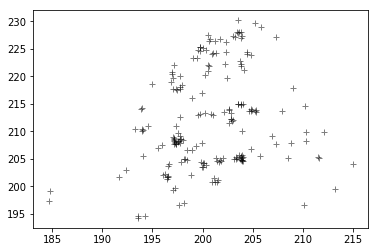

In [6]:
x = np.array([x/1000 for d,x,y in data])
y = np.array([y/1000 for d,x,y in data])

dx = np.random.random(size=len(x)) * 1
dy = np.random.random(size=len(y)) * 1

_ = plt.scatter(x+dx, y+dy, marker="+", linewidth=1, color="black", alpha=0.5)

For a "prospective scan", we single out only those clusters which last until the final day.  The default settings in the test script look for clusters up to a maximum size of 50% of the events or 3km (radius or diameter?)  The temporal size is between 1 and 7 days.

The expected clusters are:

        1.Location IDs included.: 11418, 11415, 11419, 11435, 11416, 11421, 11451, 11375, 11417
          Coordinates / radius..: (40.699240 N, 73.831760 W) / 2.90 km
          Time frame............: 2001/11/22 to 2001/11/24
          Number of cases.......: 4
          Expected cases........: 0.67
          Observed / expected...: 5.97
          Test statistic........: 3.845418
          P-value...............: 0.229
          Recurrence interval...: 4 days

        2.Location IDs included.: 11372
          Coordinates / radius..: (40.751460 N, 73.883070 W) / 0 km
          Time frame............: 2001/11/24 to 2001/11/24
          Number of cases.......: 2
          Expected cases........: 0.16
          Observed / expected...: 12.13
          Test statistic........: 3.164201
          P-value...............: 0.514
          Recurrence interval...: 2 days

        3.Location IDs included.: 10472
          Coordinates / radius..: (40.829960 N, 73.864640 W) / 0 km
          Time frame............: 2001/11/23 to 2001/11/24
          Number of cases.......: 2
          Expected cases........: 0.29
          Observed / expected...: 6.81
          Test statistic........: 2.137259
          P-value...............: 0.959
          Recurrence interval...: 1 day

Running a retrospective analysis instead yields the following.  Notice that _none_ of these clusters exist until the end of time, suggesting that it is _not_ the case that the "prospective" analysis runs the same test and then only resports certain clusters.  Rather, it seems that it limits its search to only clusters ending at the end of time.

    1.Location IDs included.: 10454, 10455, 10451, 10035, 10037, 10030, 10029, 10456
      Coordinates / radius..: (40.805490 N, 73.917000 W) / 2.70 km
      Time frame............: 2001/11/8 to 2001/11/8
      Number of cases.......: 5
      Expected cases........: 0.40
      Observed / expected...: 12.60
      Test statistic........: 8.119521
      P-value...............: 0.0087

    2.Location IDs included.: 11379, 11374, 11373
      Coordinates / radius..: (40.716920 N, 73.880330 W) / 2.07 km
      Time frame............: 2001/11/10 to 2001/11/11
      Number of cases.......: 4
      Expected cases........: 0.46
      Observed / expected...: 8.62
      Test statistic........: 5.113791
      P-value...............: 0.496

    3.Location IDs included.: 11418, 11415, 11419, 11435, 11416, 11421, 11451, 11375, 11417
      Coordinates / radius..: (40.699240 N, 73.831760 W) / 2.90 km
      Time frame............: 2001/11/22 to 2001/11/23
      Number of cases.......: 4
      Expected cases........: 0.46
      Observed / expected...: 8.62
      Test statistic........: 5.113791
      P-value...............: 0.496

    4.Location IDs included.: 11434
      Coordinates / radius..: (40.676220 N, 73.775200 W) / 0 km
      Time frame............: 2001/11/16 to 2001/11/16
      Number of cases.......: 2
      Expected cases........: 0.072
      Observed / expected...: 27.71
      Test statistic........: 4.725675
      P-value...............: 0.760

    5.Location IDs included.: 10304, 10301
      Coordinates / radius..: (40.608000 N, 74.093490 W) / 1.84 km
      Time frame............: 2001/11/15 to 2001/11/15
      Number of cases.......: 2
      Expected cases........: 0.072
      Observed / expected...: 27.71
      Test statistic........: 4.725675
      P-value...............: 0.760

    6.Location IDs included.: 10460, 10457, 10462
      Coordinates / radius..: (40.843800 N, 73.879980 W) / 1.83 km
      Time frame............: 2001/11/9 to 2001/11/9
      Number of cases.......: 3
      Expected cases........: 0.25
      Observed / expected...: 11.88
      Test statistic........: 4.696100
      P-value...............: 0.767

    7.Location IDs included.: 11210, 11230, 11226
      Coordinates / radius..: (40.625050 N, 73.945750 W) / 2.49 km
      Time frame............: 2001/11/5 to 2001/11/5
      Number of cases.......: 3
      Expected cases........: 0.37
      Observed / expected...: 8.08
      Test statistic........: 3.658474
      P-value...............: 0.999

# Constructing all possible space regions

For each point, we look at disks centred at that point with radii chosen to just be large enough to encompass 0, 1, 2 and so on many closest points.  This leads to some disks which contain the same point, so we construct just the unique points.

We also apply the constraints that no disc can contain more than 50% of the events (which is different from 50% of the points) and that no disc can have a radii greater than 3km.

In [7]:
all_locations = []

for _, x, y in data:
    if any((x-xx)**2 + (y-yy)**2 < 1e-6  for (xx, yy) in all_locations):
        continue
    all_locations.append( (x,y) )

len(all_locations)

75

In [8]:
from collections import namedtuple
Disc = namedtuple("Disc", ["x", "y", "r"])

discs = []
for i, (x,y) in enumerate(all_locations):
    dists = [ np.sqrt((x-xx)**2+(y-yy)**2) for j, (xx,yy) in enumerate(all_locations) ]
    dists = [r for r in dists if r<=3000]
    dists.sort()
    if len(dists) > 1:
        mingap = min(x-y for x,y in zip(dists[1:], dists))
        delta = min(0.01, mingap/2)
        radii = [r + delta for r in dists]
    else:
        radii = [0]
    discs.extend( Disc(x,y,r) for r in radii )

In [9]:
# Find discs which actually contain the same points

def locations_in(x,y,r):
    return [ i for i,(xx,yy) in enumerate(all_locations) if (x-xx)**2 + (y-yy)**2 <= r*r ]

space_regions = dict()
for disc in discs:
    key = frozenset(locations_in(*disc))
    if key not in space_regions:
        space_regions[key] = []
    space_regions[key].append(disc)

# This doesn't do anything for this data set
space_regions = { key : space_regions[key] for key in space_regions if len(key)*2 <= len(data) }
    
len(space_regions), len(discs)

(270, 311)

In [10]:
# Replace discs by the shorter list, and compute counts

discs = [ space_regions[key][0] for key in space_regions ]
space_counts = []
for disc in discs:
    rr = disc.r ** 2
    space_counts.append(sum(
        (x-disc.x)**2 + (y-disc.y)**2 <= rr
        for date, x, y in data ))

## Find the cluster which SaTScan finds

As a sanity check, let's check that one of our discs agrees with the cluster which SaTScan finds!
The first cluster which SaTScan finds is:

    Location IDs included.: 11418, 11415, 11419, 11435, 11416, 11421, 11451, 11375, 11417
    Coordinates / radius..: (40.699240 N, 73.831760 W) / 2.90 km
    
This is a bit misleading, as _not all zip codes appear in the case file data!_

(This location is centred on 11418.)

In [11]:
expected = [11418, 11415, 11419, 11435, 11416, 11421, 11451, 11375, 11417]
for zipcode in expected:
    if not any(z == str(zipcode) for _,z in raw_data):
        print("{} not found".format(zipcode))
expected = [ str(zipcode) for zipcode in expected
           if any(z == str(zipcode) for _,z in raw_data) ]
expected

11419 not found
11416 not found
11451 not found
11375 not found


['11418', '11415', '11435', '11421', '11417']

In [12]:
x, y = proj(-73.831760, 40.699240)
radius = 2903 # 2900 doesn't work
pts = [ (xx,yy) for xx, yy in all_locations
       if (x-xx)**2 + (y-yy)**2 <= radius**2 ]
zips = [ get_zip_code(xx,yy) for xx,yy in pts ]
zips

['11421', '11417', '11415', '11418', '11435']

If we use a disk of radius 2900 then we miss 11417.  This is either due to my code using a projection, while SaTScan apparently works with great circles on an (idealised?) sphere; or it could be down to rounding 2903m to 2.90km.

In [13]:
xx, yy = coord_lookup["11417"]
np.sqrt((x-xx)**2 + (y-yy)**2)

2902.8915483554074

In [14]:
# Find the indices into `all_locations` for these zip codes
expected_indexes = [all_locations.index(coord_lookup[zipcode]) for zipcode in expected]
expected_indexes

[50, 45, 59, 26, 28]

In [15]:
# Finally find the disc!
space_regions[frozenset(expected_indexes)]

[Disc(x=206471.83133200672, y=207365.95278645432, r=2902.9015483554076)]

# Constructing all possible time regions

For a "prospective" scan we look only at intervals which end on the final date, and are between 1 and 7 days in size.

In [16]:
last_date = max(d for d,_,_ in data)
time_regions = [(last_date - datetime.timedelta(days=i), last_date)
               for i in range(7)]

In [17]:
time_counts = []
for time_region in time_regions:
    start, end = time_region
    count = sum(d >= start and d <= end for d,_,_ in data)
    time_counts.append(count)
    
time_counts

[8, 19, 26, 35, 50, 55, 58]

# Compute the statistic for each region

In [18]:
def count(disc, time_region, data=data):
    start, end = time_region
    rr = disc.r ** 2
    return sum(
        date >= start and date <= end and
        (x-disc.x)**2 + (y-disc.y)**2 <= rr
        for date, x, y in data)

def log_likelihood(c, mu):
    # Shouldn't be called with c=0
    return c * (np.log(c) - np.log(mu))

def statistic(c, N, space_count, time_count):
    mu = space_count * time_count / N
    return log_likelihood(c, mu) + log_likelihood(N-c, N-mu)

In [19]:
Comb = namedtuple("Comb", ["space_count", "time_count", "data_count", "stat"])

def make_combinatorial(data):
    N = len(data)
    combinatorial = dict()
    for space_index, disc in enumerate(discs):
        space_count = space_counts[space_index]
        for time_index, time_region in enumerate(time_regions):
            key = (disc, time_region)
            time_count = time_counts[time_index]
            expected_count = space_count * time_count / N
            actual_count = count(key[0], key[1], data)
            if actual_count > expected_count:
                s = statistic(actual_count, N, space_count, time_count)
            else:
                s = -np.inf
            combinatorial[key] = Comb(space_count, time_count, actual_count, s)
    return combinatorial
            
combinatorial = make_combinatorial(data)

# Find clusters

In [20]:
clusters = { key : combinatorial[key] for key in combinatorial
           if combinatorial[key].stat > -np.inf }

In [21]:
max(comb.stat for comb in clusters.values())

3.8454183710604433

In [22]:
best = {key:clusters[key] for key in clusters if clusters[key].stat > 3.8}
best_key = next(iter(best))
best

{(Disc(x=206471.83133200672, y=207365.95278645432, r=2902.9015483554076),
  (datetime.datetime(2001, 11, 22, 0, 0),
   datetime.datetime(2001, 11, 24, 0, 0))): Comb(space_count=5, time_count=26, data_count=4, stat=3.8454183710604433)}

In [23]:
zipcode = get_zip_code(best_key[0].x, best_key[0].y)
print("Zip code of centre of disc:", zipcode)
print("Lon/Lat coords:", raw_coord_lookup[zipcode])
print("Expected count:",5 * 26 / len(data))

Zip code of centre of disc: 11418
Lon/Lat coords: (-73.83176, 40.69924)
Expected count: 0.6701030927835051


If we compare this to what we expect:

    1.Location IDs included.: 11418, 11415, 11419, 11435, 11416, 11421, 11451, 11375, 11417
      Coordinates / radius..: (40.699240 N, 73.831760 W) / 2.90 km
      Time frame............: 2001/11/22 to 2001/11/24
      Number of cases.......: 4
      Expected cases........: 0.67
      Observed / expected...: 5.97
      Test statistic........: 3.845418
      P-value...............: 0.229
      Recurrence interval...: 4 days
      
Then we seem to get a good match!

# Find other clusters

What we expect (and what find!)

    2.Location IDs included.: 11372
      Coordinates / radius..: (40.751460 N, 73.883070 W) / 0 km
      Time frame............: 2001/11/24 to 2001/11/24
      Test statistic........: 3.164201
      
    3.Location IDs included.: 10472
      Coordinates / radius..: (40.829960 N, 73.864640 W) / 0 km
      Time frame............: 2001/11/23 to 2001/11/24
      Test statistic........: 2.137259

In [24]:
def discs_intersect(d1, d2):
    dist = np.sqrt((d1.x - d2.x)**2 + (d1.y - d2.y)**2)
    return dist <= d1.r + d2.r

def discs_contain_points_in_intersection(d1, d2):
    in1 = set(i for i,(d,x,y) in enumerate(data) if (x-d1.x)**2 + (y-d1.y)**2 <= d1.r**2)
    in2 = set(i for i,(d,x,y) in enumerate(data) if (x-d1.x)**2 + (y-d1.y)**2 <= d1.r**2)
    return len(in1.intersection(in2)) > 0

In [25]:
best_keys = {best_key}

In [26]:
for _ in range(2):
    cluster_keys = [key for key in clusters.keys()
        if not any(discs_intersect(bkey[0], key[0]) for bkey in best_keys)]
    max_stat = max(clusters[key].stat for key in cluster_keys)
    next_best = {key:clusters[key] for key in cluster_keys if clusters[key].stat >= max_stat-0.001}
    next_key = next(iter(next_best))
    print("Next best key:", next_key)
    print("With statistic", max_stat)
    zipcode = get_zip_code(next_key[0].x, next_key[0].y)
    print("Zip code of centre of disc:", zipcode)
    print("Lon/Lat coords:", raw_coord_lookup[zipcode])
    best_keys.add(next_key)

Next best key: (Disc(x=202094.94773067575, y=213132.66867960128, r=0.01), (datetime.datetime(2001, 11, 24, 0, 0), datetime.datetime(2001, 11, 24, 0, 0)))
With statistic 3.16420115704
Zip code of centre of disc: 11372
Lon/Lat coords: (-73.88307, 40.75146)
Next best key: (Disc(x=203588.077360351, y=221860.39352195128, r=0.01), (datetime.datetime(2001, 11, 23, 0, 0), datetime.datetime(2001, 11, 24, 0, 0)))
With statistic 2.13725887188
Zip code of centre of disc: 10472
Lon/Lat coords: (-73.86464, 40.82996)


# Computing p-values

The monte carlo simuation stuff only enters the picture when we wish to compute p-values.  To do this, we randomly shuffle the dates and recompute the largest value of the statistic for _any_ cluster.

In [27]:
def make_random_data(data):
    dates = np.array([d for d,x,y in data])
    np.random.shuffle(dates)
    return [(d,x,y) for (d,(_,x,y)) in zip(dates, data)]

max_stats = []
for _ in range(999):
    new_data = make_random_data(data)
    new_comb = make_combinatorial(new_data)
    max_stats.append(max(x.stat for x in new_comb.values()))

In [28]:
max_stats = np.sort(max_stats)
sum(max_stats >= 3.84), sum(max_stats >= 3.16), sum(max_stats >= 2.13)

(150, 403, 989)

I ran SaTScan with 99999 Monte Carlo loops, and it reported the following critical values (which is an output option):

    Standard Monte Carlo Critical Values:
    ... 0.00001: 9.386483
    .... 0.0001: 8.297913
    ..... 0.001: 7.121381
    ...... 0.01: 5.887987
    ...... 0.05: 4.752877
    
With just 999 loops, we get:

    Standard Monte Carlo Critical Values:
    ..... 0.001: 9.386483
    ...... 0.01: 5.920812
    ...... 0.05: 4.752877
    
You can also ask the program to save the values as the file `NYCFever.llr.txt`

In [29]:
max_stats[-10], max_stats[-50]

(5.8879867933947256, 4.7109645229397525)

In [30]:
with open("NYCfever.llr.txt") as llr:
    stats = [float(line) for line in llr]
stats = np.sort(stats)

FileNotFoundError: [Errno 2] No such file or directory: 'NYCfever.llr.txt'

In [ ]:
plt.plot(stats)
plt.plot(max_stats)
plt.legend(["SaTScan", "Us"])
None

# Use our library code

In [ ]:
import open_cp
import open_cp.stscan

In [ ]:
import importlib
importlib.reload(open_cp.stscan)

In [ ]:
timestamps, xcs, ycs = tuple(zip(*data))
timestamps, xcs, ycs = open_cp.data.order_by_time(timestamps, xcs, ycs)
points = open_cp.TimedPoints.from_coords(timestamps, xcs, ycs)

### Check we construct the same discs

In [ ]:
def close(centre, d):
    return (centre[0] - d.x)**2 + (centre[1] - d.y)**2 < 0.00001

def inside(pt, d):
    return (pt[0] - d.x)**2 + (pt[1] - d.y)**2 <= d.r**2

def contents(d, points):
    s = set()
    for i, pt in enumerate(points.T):
        if inside(pt, d):
            s.add(i)
    return frozenset(s)

print("We have {} discs from above".format(len(discs)))
discs_to_contents = [ contents(d, points.coords) for d in discs ]
    
discs[0], discs_to_contents[0]

In [ ]:
our_discs = open_cp.stscan._possible_space_clusters(points.coords, 3000)
print("We have {} discs from the library code".format(len(our_discs)))
our_discs_to_contents = [contents(Disc(d.centre[0], d.centre[1], d.radius), points.coords) for d in our_discs]

our_discs[0], our_discs_to_contents[0]

In [ ]:
for i, contents in enumerate(discs_to_contents):
    if contents not in our_discs_to_contents:
        raise Exception("Missing {} from {}".format(contents, discs[i]))
        
for contents in our_discs_to_contents:
    if contents not in discs_to_contents:
        raise Exception("(2) Missing {}".format(contents))

# Check we construct the same time regions

In [ ]:
end_time = points.timestamps[-1].astype(datetime.datetime)
start_times = open_cp.stscan._possible_start_times(points.timestamps, datetime.timedelta(days=6), end_time)

our_time_regions = [(st.astype(datetime.datetime), end_time) for st in start_times]

assert(set(time_regions) == set(our_time_regions))

# Check we find the same first 3 clusters

In [ ]:
trainer = open_cp.stscan.STSTrainer()
trainer.geographic_population_limit = 0.5
trainer.geographic_radius_limit = 3000
trainer.time_population_limit = 1.0
trainer.time_max_interval = datetime.timedelta(days=6)
trainer.data = points

In [ ]:
result = trainer.predict()

Best cluster should be:

     {(Disc(x=206471.83133200672, y=207365.95278645432, r=2902.9015483554076),
      (datetime.datetime(2001, 11, 22, 0, 0),
       datetime.datetime(2001, 11, 24, 0, 0))): Comb(space_count=5, time_count=26, data_count=4, stat=3.8454183710604433)}
       
Followed by:

    Next best key: (Disc(x=202094.94773067575, y=213132.66867960128, r=0.01), (datetime.datetime(2001, 11, 24, 0, 0), datetime.datetime(2001, 11, 24, 0, 0)))
    With statistic 3.16420115704
    Next best key: (Disc(x=203588.077360351, y=221860.39352195128, r=0.01), (datetime.datetime(2001, 11, 23, 0, 0), datetime.datetime(2001, 11, 24, 0, 0)))
    With statistic 2.13725887188

In [ ]:
assert close(result.clusters[0].centre, Disc(x=206471.83133200672, y=207365.95278645432, r=2902.9015483554076))
assert close(result.clusters[1].centre, Disc(x=202094.94773067575, y=213132.66867960128, r=0.01))
assert close(result.clusters[2].centre, Disc(x=203588.077360351, y=221860.39352195128, r=0.01))

assert result.time_ranges[0] == (datetime.datetime(2001,11,22), datetime.datetime(2001,11,24))
assert result.time_ranges[1] == (datetime.datetime(2001,11,24), datetime.datetime(2001,11,24))
assert result.time_ranges[2] == (datetime.datetime(2001,11,23), datetime.datetime(2001,11,24))

assert abs(result.statistics[0] - 3.8454183710604433) < 1e-6
assert abs(result.statistics[1] - 3.16420115704) < 1e-6
assert abs(result.statistics[2] - 2.13725887188) < 1e-6

In [ ]:
max_clusters = trainer.maximise_clusters(result.clusters)

## A plot

We finish with a plot of the data and the found clusters (the first 5).  We caution that such a plot is misleading-- there is no attempt to visualise the _time stamps_ of the data, and so it is very hard to visualise what is a cluster...

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

x = np.array([x for d,x,y in data])
y = np.array([y for d,x,y in data])

dx = np.random.random(size=len(x)) * 100
dy = np.random.random(size=len(y)) * 100

ax.scatter(x+dx, y+dy, marker="+", linewidth=1, color="black", alpha=0.5)

for mic, mac in zip(result.clusters[:5], max_clusters):
    c = plt.Circle(mic.centre, mac.radius, alpha=0.3, color="red")
    ax.add_artist(c)
    c = plt.Circle(mic.centre, mic.radius, alpha=0.3, color="blue")
    ax.add_artist(c)
    
ax.set_aspect(1)

# Does SaTScan look at all discs?

Consider the following artificial arrangement of points.  Ordered by the x coordinate, there is (as shown) a disk containing points 0,1,2 but not 3.  However, no disk _which is centred on a point_ can perform this separation.

In [ ]:
points = np.array([[.1,1.5],[.2,1],[.9,.2],[1.3,.1],[1.8,1],[1.9,1.3]]).T

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(points[0], points[1])
c = plt.Circle([1,1], 0.9, alpha=0.2, color="Red")
ax.add_artist(c)
ax.set(xlim=[0,2], ylim=[0,2])
None

In [ ]:
one = np.datetime64("2017-01-01")
two = np.datetime64("2017-01-02")

timestamps = [one, two, two, one, two, one]

In [ ]:
with open("artifical1.geo", "w") as geofile:
    for i, (x,y) in enumerate(points.T):
        print("{}\t{}\t{}".format(10000+i, x, y), file=geofile)
        
with open("artifical1.cas", "w") as casefile:
    for i, (t) in enumerate(timestamps):
        print("{}\t{}\t{}".format(10000+i, 1, t), file=casefile)

In [ ]:
N = len(timestamps)
allsets = [ set(j for j in range(N) if ((i+1)&(2**j))!=0)
           for i in range(2**N-1) ]
timeranges = [(np.datetime64("2017-01-02"),np.datetime64("2017-01-02")),
             (np.datetime64("2017-01-01"),np.datetime64("2017-01-02"))]

def print_all(allsets):
    lines = []
    for space_set in allsets:
        for timerange in timeranges:
            in_time =set(i for i,t in enumerate(timestamps) if timerange[0]<=t and t<=timerange[1])
            expected = len(space_set) * len(in_time) / len(timestamps)
            actual = len(space_set.intersection(in_time))
            if actual > expected:
                lines.append((space_set, timerange, expected, actual,
                      statistic(actual, len(timestamps), len(space_set), len(in_time))))
    lines.sort(key = lambda tu : tu[4])
    for l in lines:
        print(l)

print_all(allsets)

In [ ]:
from_centred_disks = []
for pt in points.T:
    dists = np.sqrt(np.sum((pt[:,None] - points)**2, axis=0)) * 1.0001
    for d in dists:
        s = frozenset(i for i,p in enumerate(points.T) if
           np.sqrt(np.sum((pt-p)**2)) <= d)
        from_centred_disks.append(s)
        
from_centred_disks = list(set(from_centred_disks))

print_all(from_centred_disks)

SaTScan can only be configured to look at spatial and temporal regions with up to 50% of data.  So with 6 points, we should ignore ignore sets containing more than 3 points.

- Looking at "centred disks" we find that 0.104232 is the greatest statistic, for sets {2,3,4} or {0,1,2} or {1,2,3}.  SaTScan finds {0,1,2}.
- Looking at all possible sets, the set {1,2,4} is the best with statistic 0.863046
- This is the disk we highlighted above.

**Conclusion:** SatScan looks only at spatial regions which are centred on the location of an event.  This can lead to missing "clusters".

# Generate random data for testing

We generate some purely random data, which we shall use of an "integration test" of our `stscan` code.

While performing comparisons with the SaTScan output, I also noticed that SaTScan does not report "clusters" of just one event.  This seems very reasonable, and is now implemented in our code.

In [ ]:
# Generate random data and save
N = 30
points = np.random.random(size=N*2).reshape(2,N)
timestamps = np.datetime64("2017-01-01") + np.random.randint(10, size=N) * np.timedelta64(1, "D")

timestamps, xcs, ycs = open_cp.data.order_by_time(timestamps, points[0], points[1])
points = np.array([xcs, ycs])

def write_test_file(basename):
    with open(basename + ".geo", "w") as geofile:
        for i, (x,y) in enumerate(points.T):
            print("{}\t{}\t{}".format(10000+i, x, y), file=geofile)

    with open(basename + ".cas", "w") as casefile:
        for i, (t) in enumerate(timestamps):
            print("{}\t{}\t{}".format(10000+i, 1, t), file=casefile)

import os
#write_test_file(os.path.join("..", "tests", "sts_test_data"))

In [ ]:
# Read data from file

def read_test_file(basename):
    coords = []
    with open(basename + ".geo") as geofile:
        for line in geofile:
            i, x, y = line.split()
            coords.append( (float(x), float(y)) )

    timestamps = []
    with open(basename + ".cas") as casefile:
        for line in casefile:
            i, count, t = line.split()
            timestamps.append(np.datetime64(t))
            
    return np.asarray(timestamps), np.asarray(coords).T

timestamps, points = read_test_file(os.path.join("..", "tests", "sts_test_data"))      

In [ ]:
timestamps

In [ ]:
plt.scatter(points[0], points[1])

In [ ]:
trainer = open_cp.stscan.STSTrainer()
trainer.geographic_population_limit = 0.5
trainer.geographic_radius_limit = 3000
trainer.time_population_limit = 0.5
trainer.time_max_interval = datetime.timedelta(days=10)
trainer.data = open_cp.TimedPoints.from_coords(timestamps, points[0], points[1])
result = trainer.predict()

In [ ]:
result.time_ranges

In [ ]:
result.clusters

In [ ]:
result.statistics

## Compare the simulated p-values

In [ ]:
with open(os.path.join("..","tests","sts_test_data.llr.txt")) as statfile:
    satscan_stats = [float(x) for x in statfile]
    
satscan_stats.sort()
plt.plot(satscan_stats)

In [ ]:
our_stats = trainer.monte_carlo_simulate(runs=9999)

In [ ]:
our_stats.sort()
stats = [our_stats[i*9999//99999] for i in range(99999)]
plt.plot(satscan_stats)
plt.plot(stats)
plt.legend(["SaTScan", "Us"])
None